In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("mpd2018.xlsx", 
                     sheet_name = "Full data", 
                     index_col = [0,2])

In [2]:
data

country  cgdppc  rgdpnapc      pop         i_cig i_bm
countrycode year                                                           
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN  NaN
            1870  Afghanistan     NaN       NaN   4207.0           NaN  NaN
            1913  Afghanistan     NaN       NaN   5730.0           NaN  NaN
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated  NaN
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated  NaN
...                       ...     ...       ...      ...           ...  ...
ZWE         2012     Zimbabwe  1623.0    1604.0  12620.0  Extrapolated  NaN
            2013     Zimbabwe  1801.0    1604.0  13183.0  Extrapolated  NaN
            2014     Zimbabwe  1797.0    1594.0  13772.0  Extrapolated  NaN
            2015     Zimbabwe  1759.0    1560.0  14230.0  Extrapolated  NaN
            2016     Zimbabwe  1729.0    1534.0  14547.0  Extrapolated  NaN

[19873 rows x 6 columns]

In [3]:
data.index

MultiIndex([('AFG', 1820),
            ('AFG', 1870),
            ('AFG', 1913),
            ('AFG', 1950),
            ('AFG', 1951),
            ('AFG', 1952),
            ('AFG', 1953),
            ('AFG', 1954),
            ('AFG', 1955),
            ('AFG', 1956),
            ...
            ('ZWE', 2007),
            ('ZWE', 2008),
            ('ZWE', 2009),
            ('ZWE', 2010),
            ('ZWE', 2011),
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016)],
           names=['countrycode', 'year'], length=19873)

In [4]:
data.index.get_level_values("year")

Int64Index([1820, 1870, 1913, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=19873)

In [5]:
years = data.groupby("year").mean().index

In [6]:
years

Int64Index([   1,  730, 1000, 1150, 1280, 1281, 1282, 1283, 1284, 1285,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=741)

In [7]:
pairs = [("CAN", "FIN"), ("FRA", "DEU"), ("USA","GBR", "ESP", "MEX")]
linestyles = ["-", ":","--","-."]

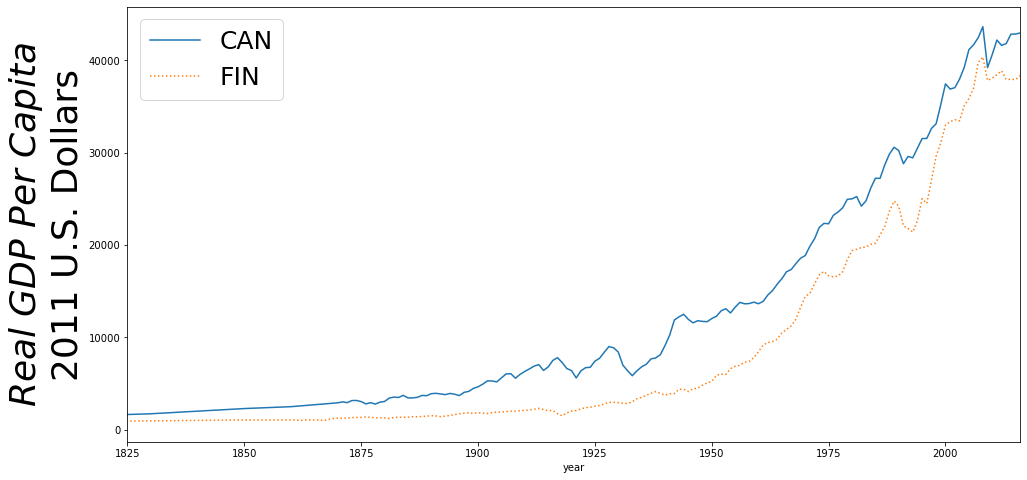

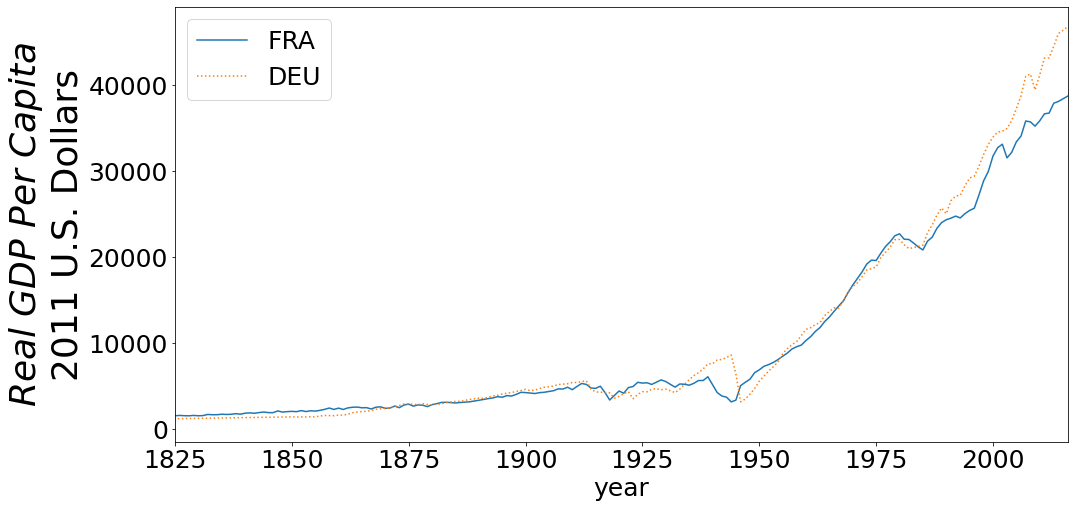

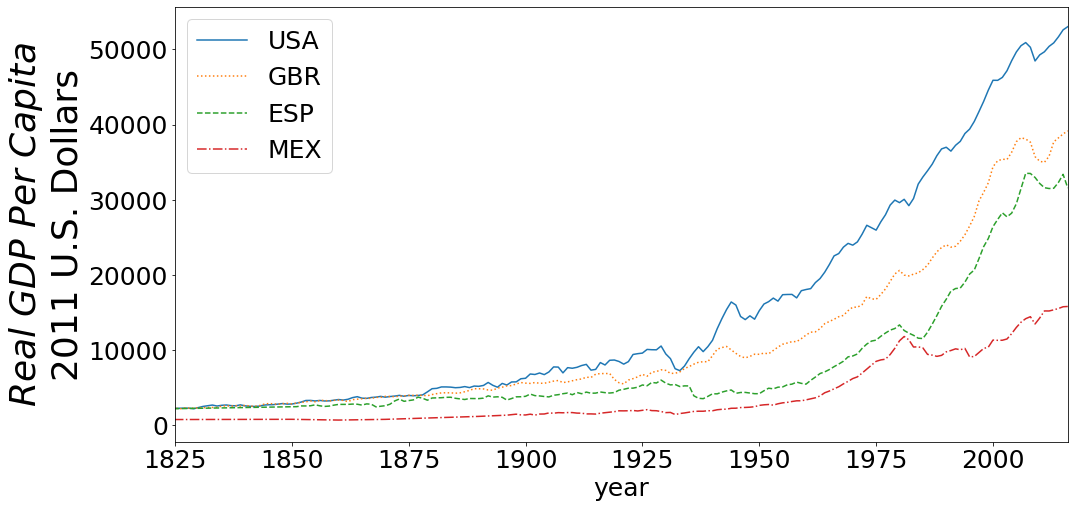

In [8]:
for pair in pairs:  
    fig, ax = plt.subplots(figsize=(16,8))  
    for i in range(len(pair)):  
        country = pair[i]  
        linestyle = linestyles[i]  
        data.loc[country,:]["cgdppc"].dropna(
        ).plot.line(ax = ax,  
               label = country, linestyle = linestyle)  
    plt.xlim([1825, max(years)])
    plt.rcParams.update({"legend.fontsize": 25, "legend.handlelength": 2})  
    plt.rcParams.update({"font.size": 25})  
    plt.ylabel(
        "$Real$ $GDP$ $Per$ $Capita$\n2011 U.S. Dollars",
        fontsize=36)  
    plt.legend()  
    plt.show()  
    plt.close()  

In [9]:
import pandas as pd  
fraser_data = pd.read_csv("cleanedEconFreedomData.csv",  
                           index_col = [0,1] , parse_dates=False)  

fraser_data = fraser_data.dropna(
    axis=0, thresh=1).dropna(axis=1, thresh=1)  
  
maddison_data = pd.read_excel("mpd2018.xlsx", sheet_name = "Full data",   
                              index_col = [0,2])


In [10]:
fraser_data["RGDP Per Capita"] = maddison_data["cgdppc"]
fraser_data
#For some reason my data dosnt have EFW, no idea how to get it 

Summary  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
AGO      2019  5.499633            7.528976                        3.667891   
         2018  4.857825            7.499565                        3.502760   
         2017  4.885597            7.256864                        3.340124   
         2016  5.428285            7.857320                        3.253098   
         2015  5.667095            7.532318                        3.249605   
...                 ...                 ...                             ...   
ZWE      2000  4.264348            5.609731                        4.486205   
         1995  5.574182            6.626867                        5.165400   
         1990  4.791186            5.636817                        4.574519   
         1985  4.634852            5.373848                        4.736138   
         1980  4.634852            6.503934                        4.439509   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
AGO      2019     4.933172                          5.393452    5.974672   
         2018     4.776278                          2.919964    5.590561   
         2017     5.502056                          2.963787    5.365154   
         2016     5.606605                          5.046955    5.377446   
         2015     6.885465                          4.904532    5.763555   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          2.946150    5.388485   
         1995     4.910010                          5.668439    5.606642   
         1990     5.658380                          4.289561    4.090217   
         1985     6.298642                          2.795490    4.270517   
         1980     6.337034                          2.897967    3.487727   

               RGDP Per Capita  
ISO_Code Year                   
AGO      2019              NaN  
         2018              NaN  
         2017              NaN  
         2016           8397.0  
         2015           8631.0  
...                        ...  
ZWE      2000           2696.0  
         1995           2841.0  
         1990           3265.0  
         1985           3615.0  
         1980           4003.0  

[3466 rows x 7 columns]

In [11]:
fraser_data.to_csv("fraserDataWithRGDPPC.csv")

In [12]:
import pandas as pd  
  
def create_indicator_variable(data, indicator_name, 
                              index_name, target_index_list):  
  
    data[indicator_name] = 0  
 
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  

index_name = data.index.names[0]  
indicator_name = "North America"  

countries_in_north_america = [
    "BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]  
create_indicator_variable(data = data, 
    indicator_name = indicator_name,  
    index_name = index_name, 
    target_index_list = countries_in_north_america)

In [13]:
data[["North America"]]

North America
ISO_Code Year                     
AGO      2019-01-01              0
         2018-01-01              0
         2017-01-01              0
         2016-01-01              0
         2015-01-01              0
...                            ...
ZWE      2000-01-01              0
         1995-01-01              0
         1990-01-01              0
         1985-01-01              0
         1980-01-01              0

[3466 rows x 1 columns]

Text(0.5, 1.0, '2000')

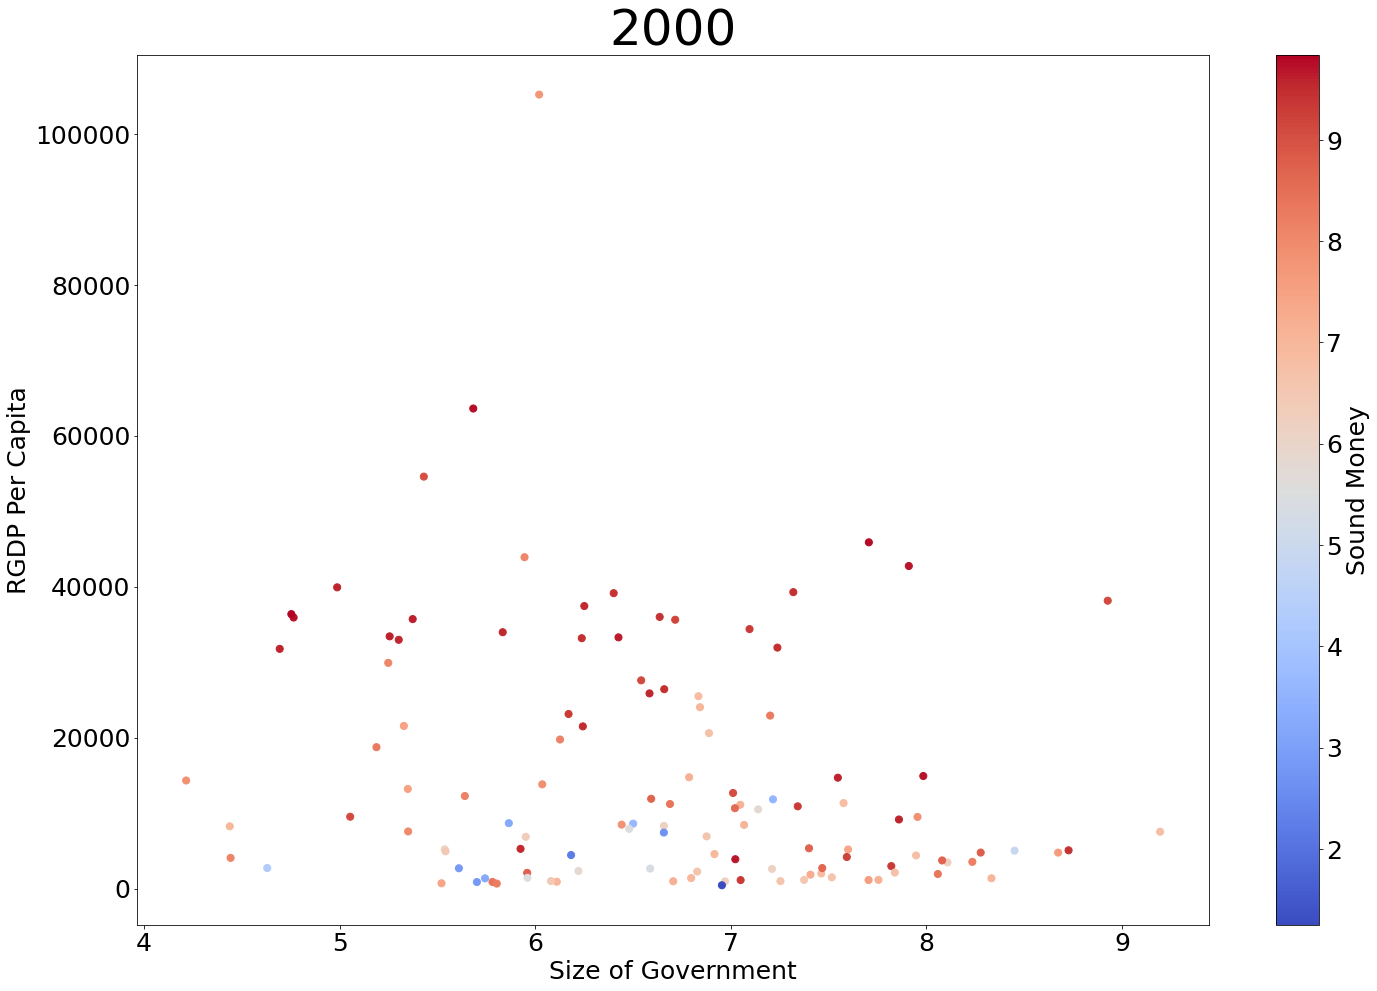

In [14]:
import datetime
year = 2000

plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(x = "Size of Government", y = "RGDP Per Capita", c = "Sound Money",
                      cmap = "coolwarm", ax = ax, s = 50)
ax.set_title(str(year), fontsize = 50)
#looks like my lack of efw came back to bite me, I have replaced it with Size of Government 

[2. 3. 4. 5. 6. 7. 8. 9.]


<ipython-input-15-d4250f117477>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])


Text(0.5, 1.0, '2000')

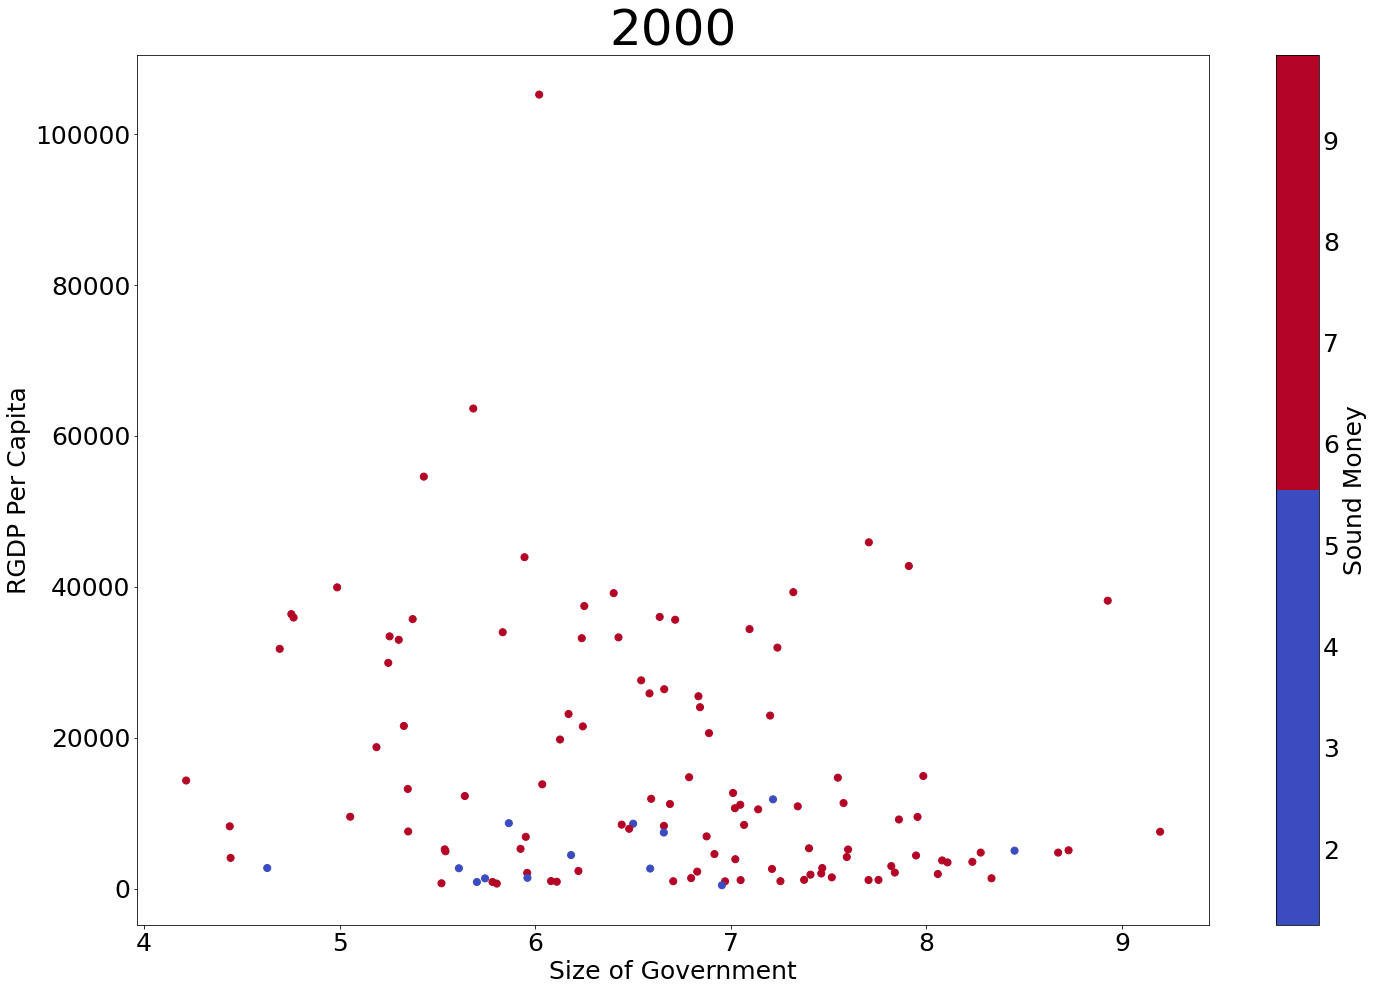

In [15]:
import datetime
from matplotlib import cm

year = 2000

norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(x = "Size of Government", y = "RGDP Per Capita", c = "Sound Money",
                      cmap = cmap, ax = ax, norm = norm, s = 50)


f = plt.gcf()
cax  = f.get_axes()[1]

vals = cax.get_yticks()
print(vals)

cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])

cax.tick_params(length = 0)

ax.set_title(str(year), fontsize = 50)
#looks like the lack of efw has a bit of a cascading impact

In [16]:
import pandas as pd  
import numpy as np  

n = 5  
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)   
quantile_var = "RGDP Per Capita"  
quantile_name = quantile_var + " " + str(n) + "-tile"  
data[quantile_name] = np.nan

In [17]:
import pandas as pd  
import numpy as np  
  
def create_quantile(n, data, year, quantile_var, quantile_name):    
    year_index = data.index.get_level_values("Year") == year  
    quantile_values_dict = {i:data[year_index][quantile_var]\
                            .quantile(i/n) for i in range(1, n + 1)}   
    for index in data[year_index].index:   
        val = data.loc[index][quantile_var]  
    
        if val <= quantile_values_dict[i]:  
            data.loc[index,[quantile_name]]=int((n + 1) - i)  
            break  
        else:  
            continue  

years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

In [18]:
data[["RGDP Per Capita", "RGDP Per Capita 5-tile"]]

RGDP Per Capita  RGDP Per Capita 5-tile
ISO_Code Year                                               
AGO      2019-01-01              NaN                     NaN
         2018-01-01              NaN                     NaN
         2017-01-01              NaN                     NaN
         2016-01-01           8397.0                     3.0
         2015-01-01           8631.0                     3.0
...                              ...                     ...
ZWE      2000-01-01           2696.0                     NaN
         1995-01-01           2841.0                     NaN
         1990-01-01           3265.0                     NaN
         1985-01-01           3615.0                     NaN
         1980-01-01           4003.0                     NaN

[3466 rows x 2 columns]

C:\Users\The Grand Tabaxi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  scatter = ax.scatter(


Text(0.5, 1.0, 'Year: 2016')

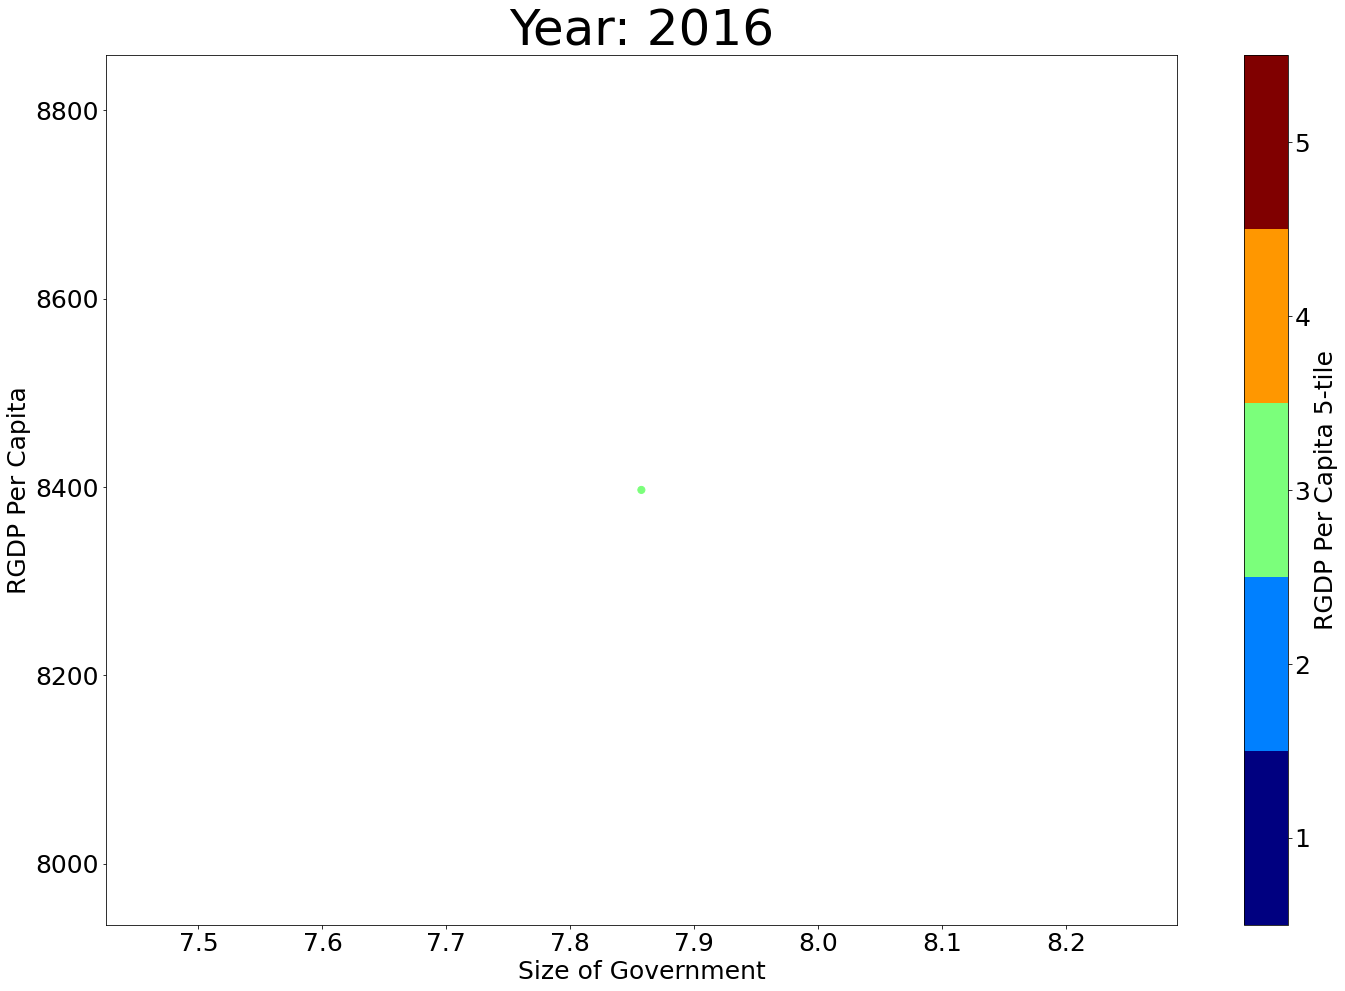

In [19]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2016
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))

norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

plot_data.plot.scatter(x = "Size of Government", y = "RGDP Per Capita", 
                       c = "RGDP Per Capita " + str(n) + "-tile",
                      cmap = cmap, norm = norm,  ax = ax, s = 50,
                      legend = False, vmin = 0.5, vmax = 5.5)
ax.set_title("Year: " + str(year), fontsize = 50)

In [20]:
import pandas as pd  
import numpy as np  
import datetime  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)


In [21]:
data.loc["USA", :]

,Summary,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita,RGDP Per Capita Lag
Year,,,,,,,,
2019-01-01,8.235357,7.400283,7.540271,9.723279,7.830032,8.682921,NaN,NaN
2018-01-01,8.262727,7.405300,7.646651,9.693202,7.783407,8.785076,NaN,NaN
2017-01-01,8.381709,7.351658,7.802985,9.799438,7.921425,9.033038,NaN,53015.0
2016-01-01,8.347574,7.253865,7.793423,9.847874,7.889288,8.953421,53015.0,52591.0
2015-01-01,8.289744,7.238331,7.745986,9.761051,7.810690,8.892662,52591.0,51664.0
2014-01-01,8.182330,7.240342,7.652592,9.389649,7.836113,8.792955,51664.0,50863.0
2013-01-01,8.146082,7.015681,7.592981,9.420297,7.964510,8.736940,50863.0,50394.0
2012-01-01,8.170527,7.395153,7.566848,9.323542,7.994894,8.572199,50394.0,49675.0
2011-01-01,8.086404,7.202605,7.491234,9.305630,8.007870,8.424683,49675.0,49267.0


In [22]:
data.index.get_level_values("Year")

DatetimeIndex(['2019-01-01', '2018-01-01', '2017-01-01', '2016-01-01',
               '2015-01-01', '2014-01-01', '2013-01-01', '2012-01-01',
               '2011-01-01', '2010-01-01',
               ...
               '2005-01-01', '2004-01-01', '2003-01-01', '2002-01-01',
               '2001-01-01', '2000-01-01', '1995-01-01', '1990-01-01',
               '1985-01-01', '1980-01-01'],
              dtype='datetime64[ns]', name='Year', length=3466, freq=None)

In [23]:
data.index.get_level_values("Year") >= datetime.datetime(1999, 1, 1)

array([ True,  True,  True, ..., False, False, False])

In [24]:
data = data[data.index.get_level_values("Year") > datetime.datetime(1999,1,1)]

In [25]:
data

Summary  Size of Government  \
ISO_Code Year                                       
AGO      2019-01-01  5.499633            7.528976   
         2018-01-01  4.857825            7.499565   
         2017-01-01  4.885597            7.256864   
         2016-01-01  5.428285            7.857320   
         2015-01-01  5.667095            7.532318   
...                       ...                 ...   
ZWE      2004-01-01  2.839458            3.984469   
         2003-01-01  3.704831            6.347416   
         2002-01-01  3.692973            6.041646   
         2001-01-01  3.741101            6.080448   
         2000-01-01  4.264348            5.609731   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2019-01-01                        3.667891     4.933172   
         2018-01-01                        3.502760     4.776278   
         2017-01-01                        3.340124     5.502056   
         2016-01-01                        3.253098     5.606605   
         2015-01-01                        3.249605     6.885465   
...                                             ...          ...   
ZWE      2004-01-01                        3.699175     0.000000   
         2003-01-01                        3.538065     1.250000   
         2002-01-01                        3.571084     1.250000   
         2001-01-01                        3.715694     1.702366   
         2000-01-01                        4.486205     2.891166   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2019-01-01                          5.393452    5.974672   
         2018-01-01                          2.919964    5.590561   
         2017-01-01                          2.963787    5.365154   
         2016-01-01                          5.046955    5.377446   
         2015-01-01                          4.904532    5.763555   
...                                               ...         ...   
ZWE      2004-01-01                          2.170844    4.342803   
         2003-01-01                          2.745167    4.643506   
         2002-01-01                          2.807382    4.794751   
         2001-01-01                          2.906199    4.300797   
         2000-01-01                          2.946150    5.388485   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
AGO      2019-01-01              NaN                  NaN  
         2018-01-01              NaN                  NaN  
         2017-01-01              NaN               8397.0  
         2016-01-01           8397.0               8631.0  
         2015-01-01           8631.0               8615.0  
...                              ...                  ...  
ZWE      2004-01-01           1813.0               1958.0  
         2003-01-01           1958.0               2376.0  
         2002-01-01           2376.0               2624.0  
         2001-01-01           2624.0               2696.0  
         2000-01-01           2696.0               2841.0  

[2916 rows x 8 columns]

In [26]:
for key in data:
    if "GDP" in key:
        data["Log " + key] = np.log(data[key])

In [27]:
diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby(level=0).diff(-1)  
data_dict["Diff Data"]["North America"] = 1
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

In [28]:
data_dict["Data"]

Summary  Size of Government  \
ISO_Code Year                                       
AGO      2019-01-01  5.499633            7.528976   
         2018-01-01  4.857825            7.499565   
         2017-01-01  4.885597            7.256864   
         2016-01-01  5.428285            7.857320   
         2015-01-01  5.667095            7.532318   
...                       ...                 ...   
ZWE      2004-01-01  2.839458            3.984469   
         2003-01-01  3.704831            6.347416   
         2002-01-01  3.692973            6.041646   
         2001-01-01  3.741101            6.080448   
         2000-01-01  4.264348            5.609731   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2019-01-01                        3.667891     4.933172   
         2018-01-01                        3.502760     4.776278   
         2017-01-01                        3.340124     5.502056   
         2016-01-01                        3.253098     5.606605   
         2015-01-01                        3.249605     6.885465   
...                                             ...          ...   
ZWE      2004-01-01                        3.699175     0.000000   
         2003-01-01                        3.538065     1.250000   
         2002-01-01                        3.571084     1.250000   
         2001-01-01                        3.715694     1.702366   
         2000-01-01                        4.486205     2.891166   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2019-01-01                          5.393452    5.974672   
         2018-01-01                          2.919964    5.590561   
         2017-01-01                          2.963787    5.365154   
         2016-01-01                          5.046955    5.377446   
         2015-01-01                          4.904532    5.763555   
...                                               ...         ...   
ZWE      2004-01-01                          2.170844    4.342803   
         2003-01-01                          2.745167    4.643506   
         2002-01-01                          2.807382    4.794751   
         2001-01-01                          2.906199    4.300797   
         2000-01-01                          2.946150    5.388485   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
AGO      2019-01-01              NaN                  NaN   
         2018-01-01              NaN                  NaN   
         2017-01-01              NaN               8397.0   
         2016-01-01           8397.0               8631.0   
         2015-01-01           8631.0               8615.0   
...                              ...                  ...   
ZWE      2004-01-01           1813.0               1958.0   
         2003-01-01           1958.0               2376.0   
         2002-01-01           2376.0               2624.0   
         2001-01-01           2624.0               2696.0   
         2000-01-01           2696.0               2841.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  
ISO_Code Year                                                      
AGO      2019-01-01                  NaN                      NaN  
         2018-01-01                  NaN                      NaN  
         2017-01-01                  NaN                 9.035630  
         2016-01-01             9.035630                 9.063116  
         2015-01-01             9.063116                 9.061260  
...                                  ...                      ...  
ZWE      2004-01-01             7.502738                 7.579679  
         2003-01-01             7.579679                 7.773174  
         2002-01-01             7.773174                 7.872455  
       

In [29]:
import pandas as pd  
import numpy as np  
import datetime  
  
def create_indicator_variable(data, indicator_name, index_name,   
                              target_index_list):  

    data[indicator_name] = 0  
 
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  

data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)  
data = data[data.index.get_level_values("Year") > datetime.datetime(2000,1,1)]  
  
for key in data:  
    if "GDP" in key:  
        data["Log " + key] = np.log(data[key])  

diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
for key in data:  
    if "GDP" in key:  
        data_dict["Diff Data"][key] = data[key].groupby(level=0).diff(-1)  
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()  
  

indicator_name = "North America"  
index_name = "ISO_Code"  
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",  
                              "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",  
                              "TTO", "USA"]  
for key in data_dict:  
    data = data_dict[key]  
    create_indicator_variable(data = data, indicator_name = indicator_name,  
        index_name = index_name,target_index_list = countries_in_north_america)  

In [30]:
data_dict[key]

Summary  Size of Government  \
ISO_Code Year                                       
AGO      2016-01-01  5.428285            7.857320   
         2015-01-01  5.667095            7.532318   
         2014-01-01  5.045543            5.488616   
         2013-01-01  5.137243            4.971822   
         2012-01-01  5.445460            6.240173   
...                       ...                 ...   
ZWE      2006-01-01  2.976952            5.006319   
         2005-01-01  2.867922            4.526672   
         2004-01-01  2.839458            3.984469   
         2003-01-01  3.704831            6.347416   
         2002-01-01  3.692973            6.041646   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2016-01-01                        3.253098     5.606605   
         2015-01-01                        3.249605     6.885465   
         2014-01-01                        3.347893     6.789737   
         2013-01-01                        3.333574     6.727762   
         2012-01-01                        3.406774     6.558439   
...                                             ...          ...   
ZWE      2006-01-01                        3.644288     0.000000   
         2005-01-01                        3.664810     0.000000   
         2004-01-01                        3.699175     0.000000   
         2003-01-01                        3.538065     1.250000   
         2002-01-01                        3.571084     1.250000   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2016-01-01                          5.046955    5.377446   
         2015-01-01                          4.904532    5.763555   
         2014-01-01                          4.834319    4.767151   
         2013-01-01                          5.694646    4.958413   
         2012-01-01                          5.856795    5.165118   
...                                               ...         ...   
ZWE      2006-01-01                          2.006928    4.227228   
         2005-01-01                          2.034895    4.113234   
         2004-01-01                          2.170844    4.342803   
         2003-01-01                          2.745167    4.643506   
         2002-01-01                          2.807382    4.794751   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
AGO      2016-01-01           -234.0                 16.0   
         2015-01-01             16.0                  3.0   
         2014-01-01              3.0                538.0   
         2013-01-01            538.0                 58.0   
         2012-01-01             58.0               1608.0   
...                              ...                  ...   
ZWE      2006-01-01            -73.0               -153.0   
         2005-01-01           -153.0               -145.0   
         2004-01-01           -145.0               -418.0   
         2003-01-01           -418.0               -248.0   
         2002-01-01           -248.0                -72.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
AGO      2016-01-01            -0.027486                 0.001856   
         2015-01-01             0.001856                 0.000348   
         2014-01-01             0.000348                 0.064508   
         2013-01-01             0.064508                 0.007209   
         2012-01-01             0.007209                 0.223892   
...                                  ...                      ...   
ZWE      2006-01-01            -0.044972                -0.088165   
         2005-01-01            -0.088165                -0.076941   
         2004-01-01            -0.076941                -0.193495

In [31]:
from regression import Regression

 
X_names = ["Size of Government", "Log RGDP Per Capita Lag"]  
y_name = ["Log RGDP Per Capita"]  
  
reg = Regression()  
for key in data_dict:  

    data = data_dict[key]  
    reg.OLS(reg_name = key, data = data.dropna(),  
            y_name = y_name, beta_names = X_names)  
    print(key, reg.estimates, sep = "\n")  
    print(reg.stats_DF)  
    print()  

You created an instance of stats()
Data
                         Coefficient        SE      t-stat  p-value  \
y = Log RGDP Per Capita                                               
Size of Government          0.002525  0.001296    1.947426  0.05161   
Log RGDP Per Capita Lag     0.995499  0.001173  848.415188  0.00000   
Constant                    0.053670  0.015341    3.498605  0.00048   

                        significance  
y = Log RGDP Per Capita               
Size of Government                    
Log RGDP Per Capita Lag          ***  
Constant                         ***  
         Estimation Statistics
r**2                  0.997159
f-stat           379447.541646
Est Var               0.004336
rootMSE               0.065850
SSE                   9.374809
SSR                3290.701471
SST                3300.076280
Obs.               2165.000000
DOF                2162.000000

Diff Data
                         Coefficient        SE     t-stat  p-value  \
y = Log RGDP Per C

In [32]:
X_names = ["Size of Government", "Log RGDP Per Capita Lag", "North America"]

for key in data_dict:  

    data = data_dict[key]  
    reg.OLS(reg_name = key, data = data.dropna(),  
            y_name = y_name, beta_names = X_names)  
    print(key, reg.estimates, sep = "\n")  
    print(reg.stats_DF)  
    print()

Data
                         Coefficient        SE      t-stat  p-value  \
y = Log RGDP Per Capita                                               
Size of Government          0.004037  0.001381    2.924506  0.00349   
Log RGDP Per Capita Lag     0.995914  0.001178  845.136190  0.00000   
North America              -0.015544  0.004950   -3.139986  0.00171   
Constant                    0.041296  0.015808    2.612316  0.00906   

                        significance  
y = Log RGDP Per Capita               
Size of Government                **  
Log RGDP Per Capita Lag          ***  
North America                     **  
Constant                          **  
         Estimation Statistics
r**2                  0.997172
f-stat           254004.922053
Est Var               0.004318
rootMSE               0.065715
SSE                   9.332231
SSR                3290.744049
SST                3300.076280
Obs.               2165.000000
DOF                2161.000000

Diff Data
             

In [33]:
#import jdc
import pandas as pd
import numpy as np
import copy
import sys
import stats
from scipy.stats import t, f  

class Regression:
    
    def __init__(self):  
        self.reg_history = {}  

    def OLS(self, reg_name, data, y_name, beta_names, min_val = 0,  
                max_val = None, constant = True):  
        self.min_val = min_val  
        if max_val != None:  
            self.max_val = max_val  
        else:  
            self.max_val = len(data)  
        self.reg_name = reg_name  
        self.y_name = y_name  
        self.beta_names = copy.copy(beta_names)
        self.data = data.copy()  
        if constant:  
            self.add_constant()  
        self.build_matrices()
        self.estimate_betas_and_yhat()
        self.calculate_regression_stats()
        self.save_output()
        
    def calculate_regression_stats(self):  
        self.sum_square_stats()  
        self.calculate_degrees_of_freedom()  
        self.calculate_estimator_variance()  
        self.calculate_covariance_matrix()  
        self.calculate_t_p_error_stats()  
        self.calculate_root_MSE()  
        self.calculate_rsquared()  
        self.calculate_fstat()  
        self.build_stats_DF()
        
    def add_constant(self):  
        self.data["Constant"] = 1  
        self.beta_names.append("Constant")   

    def build_matrices(self):
        self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])
        self.X = np.matrix(self.data[self.beta_names])
        self.X_transpose = np.matrix(self.X).getT()
        X_transp_X = np.matmul(self.X_transpose, self.X)
        self.X_transp_X_inv = X_transp_X.getI()
        self.X_transp_y = np.matmul(self.X_transpose, self.y)

    def estimate_betas_and_yhat(self):
        self.betas = np.matmul(self.X_transp_X_inv, self.X_transp_y)
        self.y_hat = np.matmul(self.X, self.betas)

        self.data[self.y_name[0] + " estimator"] = \
            [i.item(0) for i in self.y_hat]
  
        self.estimates = pd.DataFrame(self.betas, index = self.beta_names,
                                      columns = ["Coefficient"])
        self.estimates.index.name = "y = " + self.y_name[0]        

    def sum_square_stats(self):  
        ssr_list = []  
        sse_list = []  
        sst_list = []  
        mean_y = stats.mean(self.y).item(0)  
        for i in range(len(self.y)):  
  
            yhat_i = self.y_hat[i]  
            y_i = self.y[i]  
            r = yhat_i - mean_y  
            e = y_i - yhat_i  
            t = y_i - mean_y  
            ssr_list.append((r) ** 2)  
            sse_list.append((e) ** 2)  
            sst_list.append((t) ** 2)  
  
        self.ssr = stats.total(ssr_list).item(0)  
        self.sse = stats.total(sse_list).item(0)  
        self.sst = stats.total(sst_list).item(0)  

    def calculate_degrees_of_freedom(self):    
        self.lost_degrees_of_freedom = len(self.estimates)  
        self.num_obs = self.max_val + 1 - self.min_val  
        self.degrees_of_freedom = self.num_obs - self.lost_degrees_of_freedom  

    def calculate_estimator_variance(self):  
   
        self.estimator_variance = self.sse / self.degrees_of_freedom  

    def calculate_covariance_matrix(self):   
        self.cov_matrix = float(self.estimator_variance) * self.X_transp_X_inv  
        self.cov_matrix = pd.DataFrame(self.cov_matrix,  
                                       columns = self.beta_names,  
                                       index = self.beta_names)
        
    def calculate_t_p_error_stats(self):
        ratings = [.05, .01, .001]  
        results = self.estimates  
        stat_sig_names = ["SE", "t-stat", "p-value"]  
        for stat_name in stat_sig_names:  
            results[stat_name] = np.nan    
        for var in self.beta_names:  
            results.loc[var, "SE"] = self.cov_matrix[var][var] ** (1/2)  

            results.loc[var,"t-stat"] = \
                results.loc[var, "Coefficient"] / results.loc[var, "SE"]  
            results.loc[var, "p-value"] = np.round(t.sf(np.abs(results.\
                       loc[var, "t-stat"]), self.degrees_of_freedom + 1) * 2, 5)    
        significance = ["" for i in range(len(self.beta_names))]  
        for i in range(len(self.beta_names)):  
            var = self.beta_names[i]  
            for val in ratings:  
                if results.loc[var]["p-value"] < val:  
                    significance[i] = significance[i]  + "*"  
        results["signficance"] = significance


    def calculate_root_MSE(self):  
        self.root_mse = self.estimator_variance ** (1/2)  
    
    def calculate_rsquared(self):  
        self.r_sq = self.ssr / self.sst
        self.adj_r_sq = 1 - self.sse / self.degrees_of_freedom / (self.sst\
            / (self.num_obs - 1))  

    def calculate_fstat(self):  
        self.f_stat = (self.sst - self.sse) / (self.lost_degrees_of_freedom\
                      - 1) / self.estimator_variance  
        
    def build_stats_DF(self):  
        stats_dict = {"r**2":[self.r_sq],  
                     "Adj. r**2":[self.adj_r_sq],
                     "f-stat":[self.f_stat],   
                     "Est Var":[self.estimator_variance],  
                     "rootMSE":[self.root_mse],  
                     "SSE":[self.sse],  
                     "SSR":[self.ssr],   
                     "SST":[self.sst],  
                     "Obs.":[int(self.num_obs)],   
                     "DOF":[int(self.degrees_of_freedom)]}  
        self.stats_DF = pd.DataFrame(stats_dict)
        self.stats_DF = self.stats_DF.rename(index={0:"Estimation Statistics"})
        self.stats_DF = self.stats_DF.T

    def save_output(self):  
        self.reg_history[self.reg_name] = {"Reg Stats": self.stats_DF.copy(),  
                                        "Estimates": self.estimates.copy(),  
                                        "Cov Matrix":self.cov_matrix.copy(),
                                        "Data":self.data.copy()}
    
    def joint_f_test(self, reg1_name, reg2_name):  
        reg1 = self.reg_history[reg1_name]  
        reg2 = self.reg_history[reg2_name]   
        reg1_estimates = reg1["Estimates"]          
        reg2_estimates = reg2["Estimates"]  
        reg1_y_name = reg1_estimates.index.name  
        reg2_y_name = reg2_estimates.index.name  
        num_obs1 = reg1["Reg Stats"].loc["Obs."][0]  
        num_obs2 = reg2["Reg Stats"].loc["Obs."][0]  
        if num_obs1 != num_obs2:   
            self.joint_f_error()  
        if reg1_y_name == reg2_y_name:          
            restr_reg = reg1 if \
                len(reg1_estimates.index) < len(reg2_estimates.index) else reg2 
            unrestr_reg = reg2 if restr_reg is reg1 else reg1  
            restr_var_names = restr_reg["Estimates"].index  
            unrestr_var_names = unrestr_reg["Estimates"].index   
        restr_reg = restr_reg if False not in \
                [key in unrestr_var_names for key in restr_var_names] else None
        if restr_reg == None:  
            self.joint_f_error()  
        else:  
            sser = restr_reg["Reg Stats"].loc["SSE"][0]  
            sseu = unrestr_reg["Reg Stats"].loc["SSE"][0]  
            dofr = restr_reg["Reg Stats"].loc["DOF"][0]       
            dofu = unrestr_reg["Reg Stats"].loc["DOF"][0]  
            dfn = dofr - dofu  
            dfd = dofu - 1  
            f_stat = ((sser - sseu) / (dfn)) / (sseu / (dfd))  
            f_crit_val = 1 - f.cdf(f_stat,dfn = dfn, dfd = dfd)  
            f_test_label = "h_0:"  
            for key in unrestr_var_names:  
                if key not in restr_var_names:  
                    f_test_label = f_test_label + str(key) + " == "  
            f_test_label = f_test_label + "0"  
            res_dict = {"f-stat":[f_stat],  
                        "p-value":[f_crit_val],  
                        "dfn":[dfn],  
                        "dfd":[dfd]}  
            res_DF = pd.DataFrame(res_dict)  
            res_DF = res_DF.rename(index={0:""})  
            res_DF = res_DF.T  
            res_DF.index.name = f_test_label  

            return res_DF  

    def joint_f_error(self):  
            print("Regressions not comparable for joint F-test")  
            return None    
        
    def create_indicator_variable(self,data, indicator_name, index_name,   
                                  target_index_list):  
        data[indicator_name] = 0  
        for index in target_index_list:  
            data.loc[data.index.get_level_values(\
                index_name) == index, indicator_name] = 1


In [34]:
%%add_to Regression
#For some reson this does not work and causes the rest of the code to mess up
#I tried to fix it by adding the function directly into regression.py, but that still didn't work

def panel_regression(self, reg_name, data, y_name, X_names, min_val = 0,
                     max_val = None, entity = False, time = False, 
                     constant = True):
    self.indicator_lists = {}

    for i in range(len(data.index.levels)):
            if isinstance(data.index.levels[i], pd.DatetimeIndex):
                if time:
                    date_level = i
                    date_index_name = data.index.names[date_level]
                    self.indicator_lists[date_index_name] = list(data.groupby(date_index_name).mean().index)
                    self.indicator_lists[date_index_name].pop()

            else:
                if entity:
                    entity_level = i
                    entity_index_name = data.index.names[entity_level]
                    self.indicator_lists[entity_index_name] = list(data.groupby(entity_index_name).mean().index)
                    self.indicator_lists[entity_index_name].pop()

    self.indicator_names = []
    for index_name, lst in self.indicator_lists.items():
        for indicator in lst:
            self.create_indicator_variable(data, indicator, index_name, 
                                           [indicator])
        self.indicator_names = self.indicator_names + lst
            
    X_and_indicator_names = X_names + self.indicator_names
    self.OLS(reg_name, data = data, y_name = y_name, 
             beta_names = X_and_indicator_names, min_val = min_val,
             max_val = max_val, constant = constant)
    self.X_names = X_names + ["Constant"]
    self.data = self.data[self.X_names]
    self.estimates = self.estimates.loc[self.X_names]


UsageError: Cell magic `%%add_to` not found.


In [ ]:
X_names = ["Size of Government", "Log RGDP Per Capita Lag"]
y_name = ["Log RGDP Per Capita"]
   
reg = Regression()
for key, data in data_dict.items():
    panel_name = key + " panel"
    
    reg.panel_regression(reg_name = panel_name, data = data.dropna(),
            y_name = y_name, X_names = X_names, entity = True, time =True )
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF) 

In [ ]:
reg = Regression()
for key, data in data_dict.items():
    panel_name = key + " panel"  
    reg.panel_regression(reg_name = panel_name, data = data.dropna(),
            y_name = y_name, X_names = X_names, entity = True, time = True)
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF) 

In [ ]:
reg = Regression()
for key, data in data_dict.items():
    data = data_dict[key]
    reg.OLS(reg_name = key, data = data.dropna(),
            y_name = y_name, beta_names = X_names)
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF)
    panel_name = key + " panel"
    reg.panel_regression(reg_name = panel_name, data = data.dropna(),
            y_name = y_name, X_names = X_names, entity = True, time = True)
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF)    
    joint_f_test = reg.joint_f_test(key, key + " panel")
    print(joint_f_test)

In [ ]:
reg.indicator_lists